In [1]:
pip install apyori

Note: you may need to restart the kernel to use updated packages.


# Import Libraries

In [2]:
import numpy as np
import pandas as pd
from apyori import apriori
import time

# Load the Dataset

In [3]:
store_data = pd.read_csv('mushroom.csv', header = None)

In [4]:
store_data

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1,3,9,13,23,25,34,36,38,40,...,63,67,76,85,86,90,93,98,107,113
1,2,3,9,14,23,26,34,36,39,40,...,63,67,76,85,86,90,93,99,108,114
2,2,4,9,15,23,27,34,36,39,41,...,63,67,76,85,86,90,93,99,108,115
3,1,3,10,15,23,25,34,36,38,41,...,63,67,76,85,86,90,93,98,107,113
4,2,3,9,16,24,28,34,37,39,40,...,63,67,76,85,86,90,94,99,109,114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,2,7,9,13,24,28,35,36,39,50,...,63,73,83,85,88,90,93,106,112,119
8120,2,3,9,13,24,28,35,36,39,50,...,63,73,83,85,87,90,93,106,110,119
8121,2,6,9,13,24,28,35,36,39,41,...,63,73,83,85,88,90,93,106,112,119
8122,1,7,10,13,24,31,34,36,38,48,...,66,67,76,85,86,90,94,102,110,119


In [5]:
store_data.fillna(0,inplace=True)

In [6]:
store_data.head()
store_data=store_data.astype(int)
store_data

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1,3,9,13,23,25,34,36,38,40,...,63,67,76,85,86,90,93,98,107,113
1,2,3,9,14,23,26,34,36,39,40,...,63,67,76,85,86,90,93,99,108,114
2,2,4,9,15,23,27,34,36,39,41,...,63,67,76,85,86,90,93,99,108,115
3,1,3,10,15,23,25,34,36,38,41,...,63,67,76,85,86,90,93,98,107,113
4,2,3,9,16,24,28,34,37,39,40,...,63,67,76,85,86,90,94,99,109,114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,2,7,9,13,24,28,35,36,39,50,...,63,73,83,85,88,90,93,106,112,119
8120,2,3,9,13,24,28,35,36,39,50,...,63,73,83,85,87,90,93,106,110,119
8121,2,6,9,13,24,28,35,36,39,41,...,63,73,83,85,88,90,93,106,112,119
8122,1,7,10,13,24,31,34,36,38,48,...,66,67,76,85,86,90,94,102,110,119


In [7]:
rowlength = len(store_data)
no_features = len(store_data.values[0])

### Remove all 0 value which converted from nan

In [8]:
records = []
for i in range(0, rowlength):
    records.append([int(store_data.values[i,j]) for j in range(0, no_features)if int(store_data.values[i,j]) != 0])

In [9]:
threshold = 1
total_time = []
threshold_val = []

for i in range(0,8):
  start = time.time()
  rules = apriori(records,min_support=threshold)
  output = list(rules)
  end = time.time()
  total_time.append(end-start)
  threshold_val.append(threshold)
  threshold = threshold - 0.1
  #print(output)

Text(0, 0.5, 'Threshold')

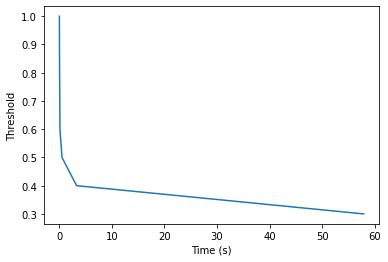

In [10]:
from matplotlib import pyplot as plt

plt.plot(total_time, threshold_val, label='Mushroom dataset')
plt.xlabel("Time (s)")
plt.ylabel("Threshold")